# Healthcare

### Description

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 

#### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

#### Variables                          Description
     
     Pregnancies                 Number of times pregnant
     
     Glucose                     Plasma glucose concentration in an oral glucose tolerance test
     
     BloodPressure               Diastolic blood pressure (mm Hg)
     
     SkinThickness               Triceps skinfold thickness (mm)
     
     Insulin                     Two hour serum insulin
    
     BMI                         Body Mass Index
    
     DiabetesPedigreeFunction    Diabetes pedigree function
    
     Age                         Age in years
    
     Outcome                     Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

# Project Task: Week 1

### Data Exploration:

#### 1.Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv("../work/health care diabetes.csv")

In [3]:
diabetes.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#to Check null and unique values in parallel
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(diabetes.isnull().sum())
null_unique['unique'] = pd.Series(diabetes.nunique())
null_unique

,nulls,unique
Pregnancies,0,17
Glucose,0,136
BloodPressure,0,47
SkinThickness,0,51
Insulin,0,186
BMI,0,248
DiabetesPedigreeFunction,0,517
Age,0,52
Outcome,0,2


In [8]:
round((diabetes.isnull().sum()/diabetes.shape[0])*100,2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [9]:
diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
diabetes['Glucose'].value_counts().head(10)

99     17
100    17
111    14
129    14
125    14
106    14
112    13
108    13
95     13
105    13
Name: Glucose, dtype: int64

#### 2.Visually explore these variables using histograms. Treat the missing values accordingly

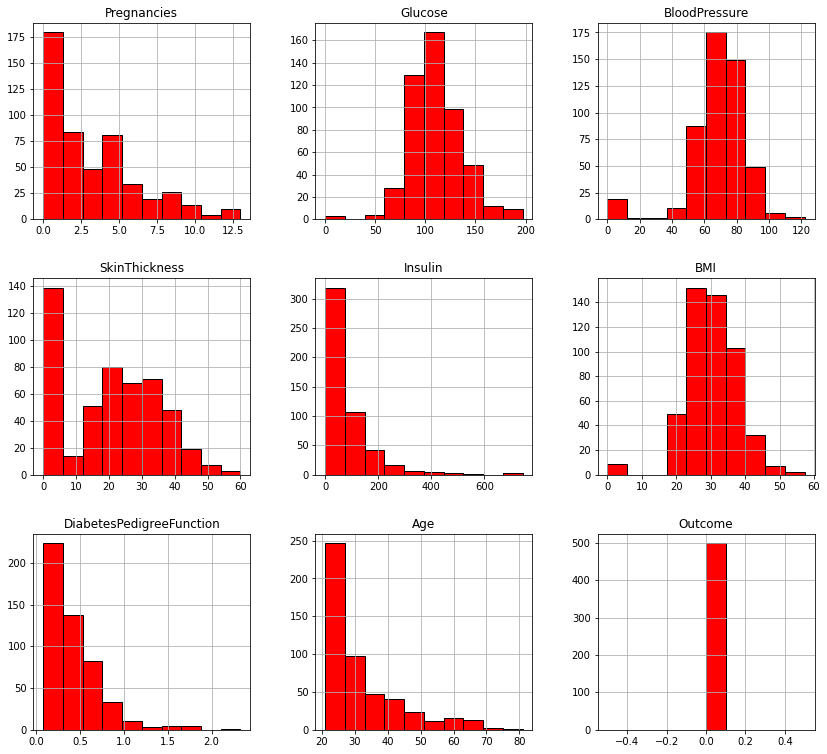

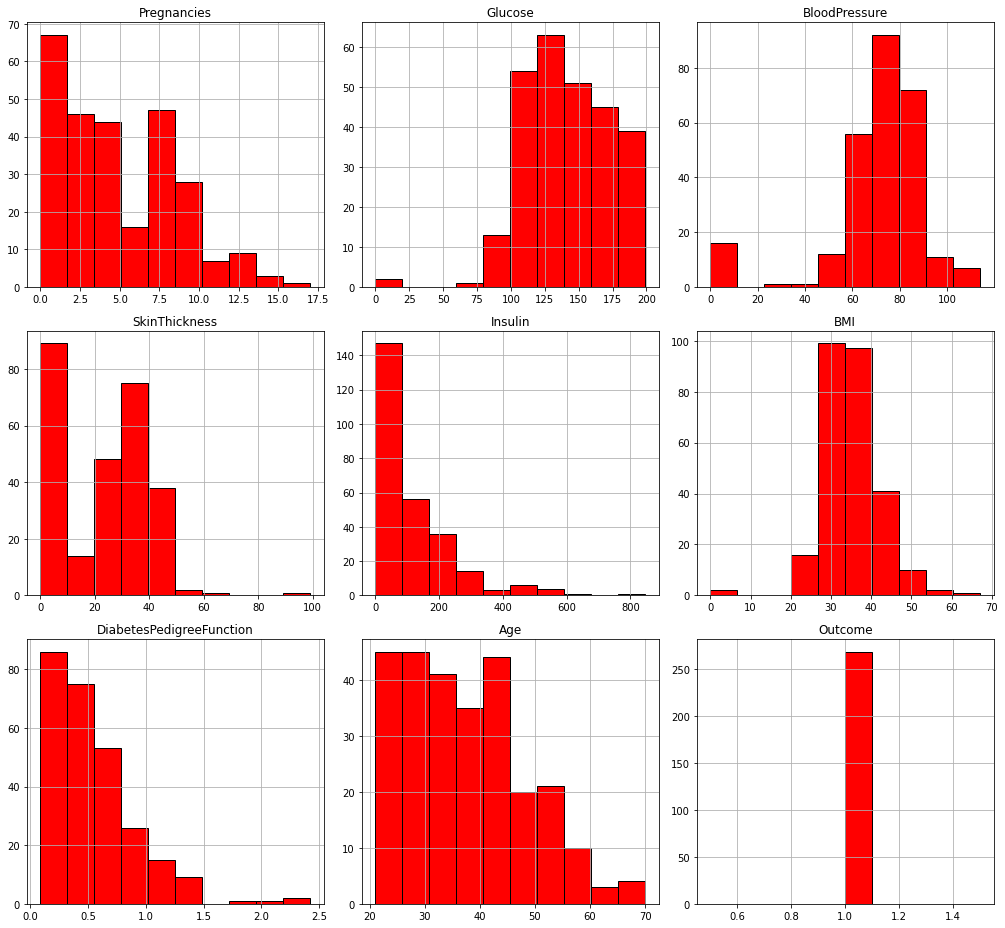

In [11]:
# Create histograms for each feature, grouped by Outcome
diabetes.groupby('Outcome').hist(figsize=(14, 13), color='red', edgecolor='black')

# Show the plots
plt.tight_layout()
plt.show()

This looks like a fairly balanced dataset, as the distribution of majority and minority class is around 0.65:0.35


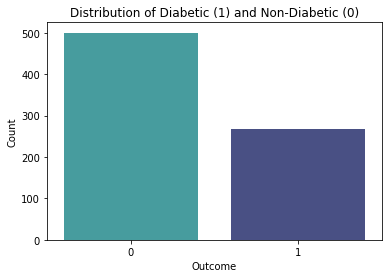

In [12]:
# Check balance of the dataset by Outcome
balance = diabetes['Outcome'].value_counts(normalize=True)
print(f"This looks like a fairly balanced dataset, as the distribution of majority and minority class is around {balance[0]:.2f}:{balance[1]:.2f}")

sns.countplot(x="Outcome", data=diabetes, palette="mako_r")
plt.title('Distribution of Diabetic (1) and Non-Diabetic (0)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of the Outcome variable:

0 (Non-Diabetic): This class has a higher count.

1 (Diabetic): This class has a lower count.

This indicates that the dataset is somewhat imbalanced, with more non-diabetic patients than diabetic patients. This imbalance could affect the performance of machine learning models, as they may become biased toward the majority class (non-diabetic).

1. BloodPressure (Diastolic)

A living person cannot have a diastolic blood pressure of zero because this would indicate that no blood is flowing through the arteries, which is incompatible with life. Therefore, any value of 0 for blood pressure is invalid.

2. Plasma Glucose Levels

Zero is an invalid number for plasma glucose levels, as fasting glucose would never be as low as zero. A person’s body always maintains some amount of glucose for basic metabolic functions. Hence, a 0 value for glucose is also invalid.

3. Skin Thickness (SkinFold)

While the skinfold thickness can vary, it would generally not be less than 10 mm for a healthy person. A zero value for skinfold thickness is physiologically impossible and should be treated as a missing or invalid value.

4. BMI (Body Mass Index)

A BMI of zero is unrealistic for a living person because BMI represents the body weight relative to height, and any non-zero weight will result in a positive BMI. Extremely low BMI values could indicate life-threatening conditions, but a value of zero is invalid.

5. Insulin

Although in some very rare cases, a person could have very low or zero insulin (e.g., in some type 1 diabetics), it is extremely unusual to see a zero insulin level in this type of dataset. However, zero insulin values should typically be treated as missing or anomalous data, unless supported by other clinical data.

In [13]:
# Check for missing values in each column
print(diabetes.isnull().sum())

# In this dataset, zero values in certain columns indicate missing data
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print((diabetes[cols_with_missing] == 0).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [14]:
# Remove rows where any of the specified columns have a zero value
diabetes_cleaned = diabetes[(diabetes[cols_with_missing] != 0).all(axis=1)]

# Check the shape of the cleaned dataset
print(diabetes_cleaned.shape)


(392, 9)


In [15]:
diabetes_cleaned .head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1


#### 3.There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

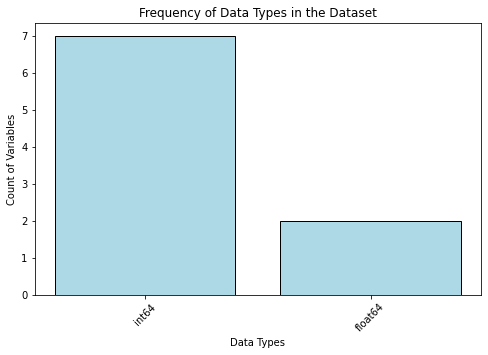

In [16]:
# Get the data types of each column
data_types = diabetes_cleaned.dtypes

# Count the frequency of each data type
data_type_counts = data_types.value_counts()

# Plot the frequency of data types
plt.figure(figsize=(8, 5))
plt.bar(data_type_counts.index.astype(str), data_type_counts.values, color='lightblue', edgecolor='black')
plt.title('Frequency of Data Types in the Dataset')
plt.xlabel('Data Types')
plt.ylabel('Count of Variables')
plt.xticks(rotation=45)
plt.show()

In [17]:
#Now we will check the stats of data after removing BloodPressure, BMI and Glucose 0 rows
diabetes_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


### Data Exploration:

#### 4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.


In [18]:
# Create a dataset for rows where Outcome is 0 (non-diabetic)
non_diabetic = diabetes_cleaned[diabetes_cleaned['Outcome'] == 0]

# Create a dataset for rows where Outcome is 1 (diabetic)
diabetic = diabetes_cleaned[diabetes_cleaned['Outcome'] == 1]

# Check the shapes of both datasets
print("Non-Diabetic Dataset Shape:", non_diabetic.shape)
print("Diabetic Dataset Shape:", diabetic.shape)

# Display the first few rows of each dataset
print("Non-Diabetic Dataset Sample:")
print(non_diabetic.head())

print("\nDiabetic Dataset Sample:")
print(diabetic.head())


Non-Diabetic Dataset Shape: (262, 9)
Diabetic Dataset Shape: (130, 9)
Non-Diabetic Dataset Sample:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
18            1      103             30             38       83  43.3   
20            3      126             88             41      235  39.3   
27            1       97             66             15      140  23.2   
28           13      145             82             19      110  22.2   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
18                     0.183   33        0  
20                     0.704   27        0  
27                     0.487   22        0  
28                     0.245   57        0  

Diabetic Dataset Sample:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4             0      137             40             35      168  43.1   
6             3     

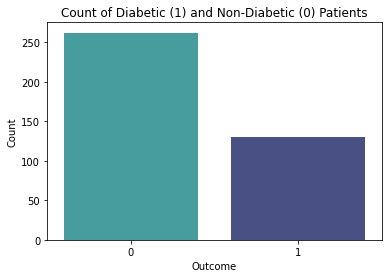

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


In [19]:
# Plot the count of outcomes (0 and 1)
sns.countplot(x="Outcome", data=diabetes_cleaned, palette="mako_r")
plt.title('Count of Diabetic (1) and Non-Diabetic (0) Patients')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Calculate the percentage distribution of each outcome
outcome_distribution = diabetes['Outcome'].value_counts(normalize=True) * 100
print(outcome_distribution)

#### 5.Create scatter charts between the pair of variables to understand the relationships. Describe your findings

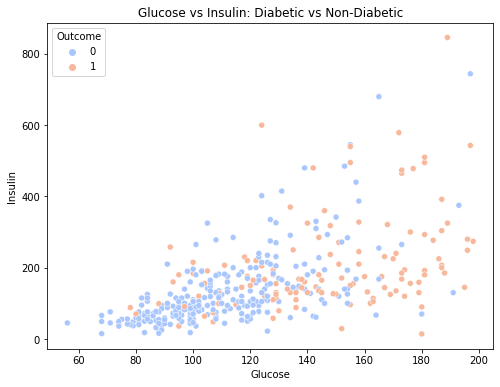

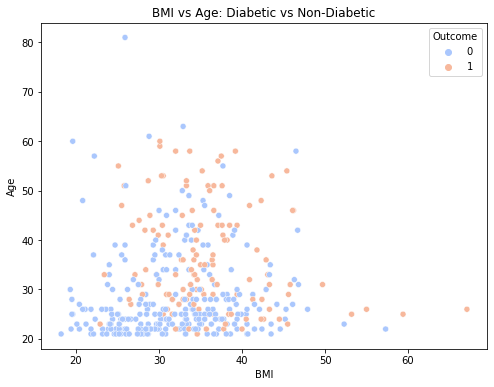

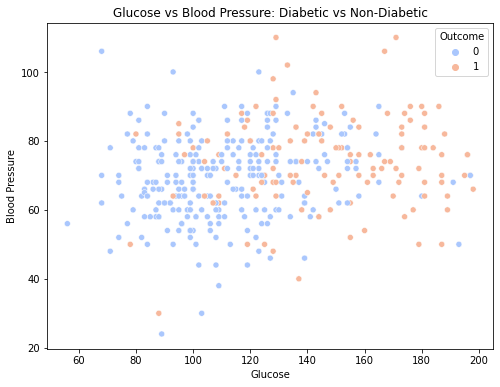

In [20]:
# Scatter plot: Glucose vs Insulin for Diabetic and Non-Diabetic patients
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=diabetes_cleaned, palette='coolwarm')
plt.title('Glucose vs Insulin: Diabetic vs Non-Diabetic')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

# Scatter plot: BMI vs Age for Diabetic and Non-Diabetic patients
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=diabetes_cleaned, palette='coolwarm')
plt.title('BMI vs Age: Diabetic vs Non-Diabetic')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

# Scatter plot: Glucose vs Blood Pressure for Diabetic and Non-Diabetic patients
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=diabetes_cleaned, palette='coolwarm')
plt.title('Glucose vs Blood Pressure: Diabetic vs Non-Diabetic')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()


##### Findining

1. Glucose vs Insulin:

Diabetic Patients (Outcome=1): diabetic patients tend to have higher glucose levels, and as glucose levels increase, insulin levels tend to rise. However, some diabetic patients might have low insulin levels, possibly indicating insulin resistance or a lack of insulin production (type 1 diabetes).

Non-Diabetic Patients (Outcome=0): Non-diabetic patients may cluster around lower glucose and insulin levels, showing more stable control over blood sugar and insulin regulation.

2. BMI vs Age:

Diabetic Patients: Diabetic patients might cluster at higher BMI values, as obesity is a well-known risk factor for type 2 diabetes. However, there may not be a clear correlation between age and BMI.

Non-Diabetic Patients: Non-diabetic patients might have lower BMI values, but the relationship between BMI and age may still be weak, with individuals of all ages having varying BMI levels.

3. Glucose vs Blood Pressure:

Diabetic Patients: Diabetic patients might show a tendency for both higher glucose and higher blood pressure, as diabetes is often associated with cardiovascular issues and hypertension.

Non-Diabetic Patients: Non-diabetic patients may show more scattered, lower glucose levels and more normalized blood pressure levels.

#### 6.Perform correlation analysis. Visually explore it using a heat map.

In [21]:
#Calculate the correlation matrix
correlation_matrix = diabetes_cleaned.corr()

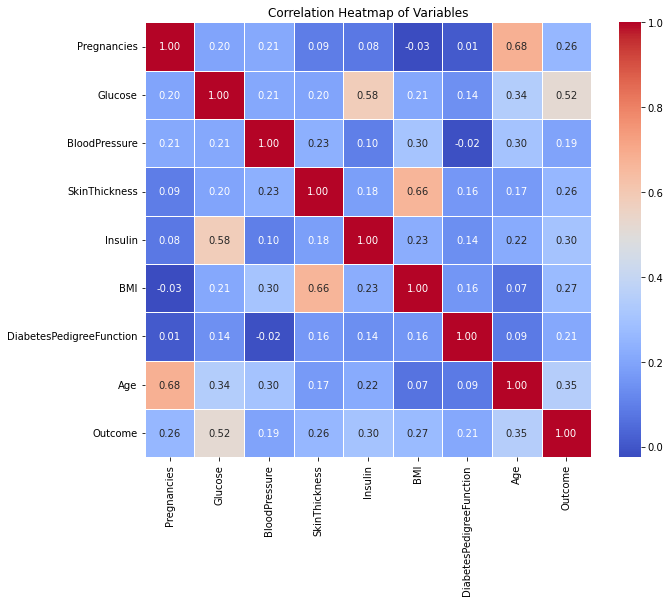

In [22]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Variables')
plt.show()

##### Glucose vs Outcome:

Strong positive correlation between Glucose and Outcome. This indicates that higher glucose levels are associated with a higher likelihood of having diabetes.

## Project Task: Week 2

### Data Modeling:

#### 1.Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

In [23]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_cleaned[feature_names]
y = diabetes_cleaned.Outcome

In [24]:
# importing additional libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [25]:
# Logistic Regression with balanced class weights
log_reg = LogisticRegression(class_weight='balanced', max_iter=200)

# Random Forest with class weights
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
# Standardize the data (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
#Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200, class_weight='balanced')

In [29]:
log_reg.fit(X_train_scaled, y_train)
print("LogisticRegression Training Score: {:.4f}".format(log_reg.score(X_train_scaled, y_train)))

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

#Print the accuracy score
print("LogisticRegression Accuracy Score: {:.4f}".format(accuracy))

LogisticRegression Training Score: 0.7700
LogisticRegression Accuracy Score: 0.8228


#### 2.Apply an appropriate classification algorithm to build a model.

In [30]:
# Step 1: Define arrays to store scores and model names
accuracyScores = []
modelScores = []
names = []

In [31]:
# Step 2: Store models in a dictionary for easier access
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [32]:
#Iterate through the dictionary of models
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Calculate training score
    train_score = model.score(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy score on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    names.append(name)
    modelScores.append(train_score)
    accuracyScores.append(test_accuracy)

In [33]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model Name': names,
    'Training Score': modelScores,
    'Accuracy Score': accuracyScores
})

# Print the results table
print(results_df)

            Model Name  Training Score  Accuracy Score
0  Logistic Regression        0.776358        0.848101
1                  SVC        0.856230        0.759494
2                  KNN        0.843450        0.784810
3        Decision Tree        1.000000        0.721519
4           GaussianNB        0.766773        0.822785
5        Random Forest        1.000000        0.797468
6    Gradient Boosting        0.996805        0.784810


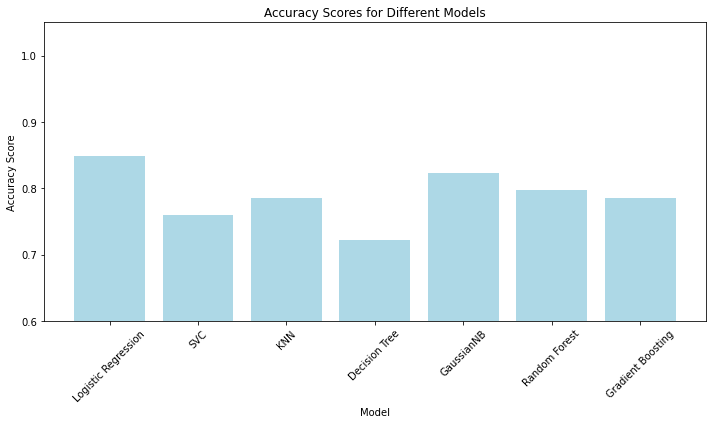

In [34]:
# Plot the accuracy scores for visual comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model Name'], results_df['Accuracy Score'], color='lightblue')
plt.title('Accuracy Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.6, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3.Compare various models with the results from KNN algorithm.

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.848101   0.791667  0.730769  0.760000  0.887518
1                  SVC  0.759494   0.640000  0.615385  0.627451  0.834543
2                  KNN  0.784810   0.714286  0.576923  0.638298  0.820392
3        Decision Tree  0.721519   0.576923  0.576923  0.576923  0.684688
4           GaussianNB  0.822785   0.687500  0.846154  0.758621  0.894049
5        Random Forest  0.797468   0.692308  0.692308  0.692308  0.854499
6    Gradient Boosting  0.784810   0.695652  0.615385  0.653061  0.830914


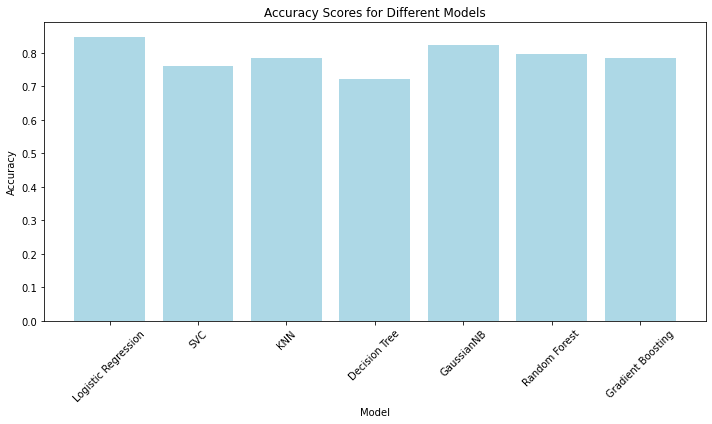

In [35]:
# Store models in a dictionary for easy iteration
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'SVC': SVC(probability=True),  # Enable probability estimates for ROC-AUC
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Store the evaluation metrics for each model
results = []

# Iterate through the models
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC-AUC if the model supports probability estimates
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_prob)
    else:
        roc_auc = None
    
    # Append results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Plot the accuracy scores for visual comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='lightblue')
plt.title('Accuracy Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Confusion Matrix:
 [[48  5]
 [ 7 19]]
Sensitivity (Recall): 0.7308
Specificity: 0.9057
Accuracy: 0.8481

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.79      0.73      0.76        26

    accuracy                           0.85        79
   macro avg       0.83      0.82      0.82        79
weighted avg       0.85      0.85      0.85        79



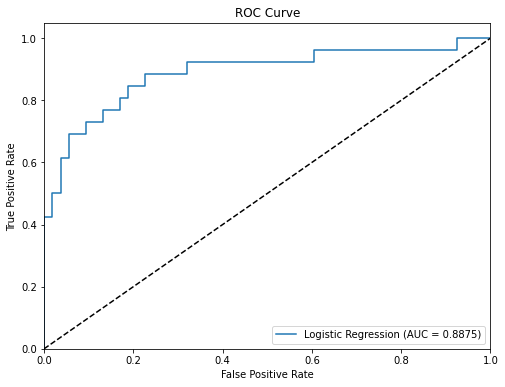

ROC-AUC Score: 0.8875


In [36]:
# Assuming you have already trained a model, for example, Logistic Regression
model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity (recall), specificity, and accuracy
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate
accuracy = accuracy_score(y_test, y_pred)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Generate a full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get the predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")


#### findings:

True Positives (TP): 38 diabetic patients correctly identified.

False Negatives (FN): 16 diabetic patients incorrectly identified as non-diabetic.

True Negatives (TN): 87 non-diabetic patients correctly identified.

False Positives (FP): 13 non-diabetic patients incorrectly identified as diabetic.